<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(1_2)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_1.2_n20.csv',
 'data_multi_delta_1.2_n30.csv',
 'data_multi_delta_1.2_n60.csv',
 'data_multi_delta_1.2_n120.csv',
 'data_multi_delta_1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_1.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,47.173642,90.017683,14.253104,161.444428,155.033108,6.411320
1,0.0,1.0,64.979189,85.432359,13.103331,173.514879,166.720847,6.794031
2,0.0,2.0,20.056318,66.271360,8.243416,104.571093,101.922066,2.649028
3,0.0,3.0,75.343437,28.171439,2.938167,116.453043,110.793321,5.659723
4,0.0,4.0,73.515743,52.844149,-1.912051,134.447841,137.403800,-2.955959
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,86.913766,48.115330,-11.394753,133.634343,146.079130,-12.444787
19996,999.0,16.0,66.843647,86.067315,18.518404,181.429367,164.778062,16.651305
19997,999.0,17.0,46.977921,29.021669,1.816261,87.815851,90.743964,-2.928113
19998,999.0,18.0,87.269805,92.776904,-14.706578,175.340132,190.091070,-14.750939


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,47.173642,90.017683,14.253104,161.444428,155.033108,6.411320
1,0.0,1.0,64.979189,85.432359,13.103331,173.514879,166.720847,6.794031
2,0.0,2.0,20.056318,66.271360,8.243416,104.571093,101.922066,2.649028
3,0.0,3.0,75.343437,28.171439,2.938167,116.453043,110.793321,5.659723
4,0.0,4.0,73.515743,52.844149,-1.912051,134.447841,137.403800,-2.955959
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,86.913766,48.115330,-11.394753,133.634343,146.079130,-12.444787
19996,999.0,16.0,66.843647,86.067315,18.518404,181.429367,164.778062,16.651305
19997,999.0,17.0,46.977921,29.021669,1.816261,87.815851,90.743964,-2.928113
19998,999.0,18.0,87.269805,92.776904,-14.706578,175.340132,190.091070,-14.750939


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    47.173642  90.017683  14.253104  161.444428  155.033108   
      1.0    64.979189  85.432359  13.103331  173.514879  166.720847   
      2.0    20.056318  66.271360   8.243416  104.571093  101.922066   
      3.0    75.343437  28.171439   2.938167  116.453043  110.793321   
      4.0    73.515743  52.844149  -1.912051  134.447841  137.403800   
...                ...        ...        ...         ...         ...   
999.0 15.0   86.913766  48.115330 -11.394753  133.634343  146.079130   
      16.0   66.843647  86.067315  18.518404  181.429367  164.778062   
      17.0   46.977921  29.021669   1.816261   87.815851   90.743964   
      18.0   87.269805  92.776904 -14.706578  175.340132  190.091070   
      19.0   83.087702  47.204021  16.156204  156.447927  141.675624   

                 e_hat  
rep   index             
0.0   0.0     6.411320  
      1.0     6.794031  
      2.0     2.649028  
      3.0     5.659723  
      4.0    -2.955959  
...                ...  
999.0 15.0  -12.444787  
      16.0   16.651305  
      17.0   -2.928113  
      18.0  -14.750939  
      19.0   14.772303  

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    47.173642  90.017683  14.253104  161.444428  155.033108   
      1.0    64.979189  85.432359  13.103331  173.514879  166.720847   
      2.0    20.056318  66.271360   8.243416  104.571093  101.922066   
      3.0    75.343437  28.171439   2.938167  116.453043  110.793321   
      4.0    73.515743  52.844149  -1.912051  134.447841  137.403800   
...                ...        ...        ...         ...         ...   
999.0 15.0   86.913766  48.115330 -11.394753  133.634343  146.079130   
      16.0   66.843647  86.067315  18.518404  181.429367  164.778062   
      17.0   46.977921  29.021669   1.816261   87.815851   90.743964   
      18.0   87.269805  92.776904 -14.706578  175.340132  190.091070   
      19.0   83.087702  47.204021  16.156204  156.447927  141.675624   

                 e_hat  
rep   index             
0.0   0.0     6.411320  
      1.0     6.794031  
      2.0     2.649028  
      3.0     5.659723  
      4.0    -2.955959  
...                ...  
999.0 15.0  -12.444787  
      16.0   16.651305  
      17.0   -2.928113  
      18.0  -14.750939  
      19.0   14.772303  

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,47.173642,90.017683,14.253104,161.444428,155.033108,6.411320
1,0.0,1.0,64.979189,85.432359,13.103331,173.514879,166.720847,6.794031
2,0.0,2.0,20.056318,66.271360,8.243416,104.571093,101.922066,2.649028
3,0.0,3.0,75.343437,28.171439,2.938167,116.453043,110.793321,5.659723
4,0.0,4.0,73.515743,52.844149,-1.912051,134.447841,137.403800,-2.955959
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,86.913766,48.115330,-11.394753,133.634343,146.079130,-12.444787
19996,999.0,16.0,66.843647,86.067315,18.518404,181.429367,164.778062,16.651305
19997,999.0,17.0,46.977921,29.021669,1.816261,87.815851,90.743964,-2.928113
19998,999.0,18.0,87.269805,92.776904,-14.706578,175.340132,190.091070,-14.750939


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    47.173642  90.017683  14.253104  161.444428  155.033108   
      1.0    64.979189  85.432359  13.103331  173.514879  166.720847   
      2.0    20.056318  66.271360   8.243416  104.571093  101.922066   
      3.0    75.343437  28.171439   2.938167  116.453043  110.793321   
      4.0    73.515743  52.844149  -1.912051  134.447841  137.403800   
...                ...        ...        ...         ...         ...   
999.0 15.0   86.913766  48.115330 -11.394753  133.634343  146.079130   
      16.0   66.843647  86.067315  18.518404  181.429367  164.778062   
      17.0   46.977921  29.021669   1.816261   87.815851   90.743964   
      18.0   87.269805  92.776904 -14.706578  175.340132  190.091070   
      19.0   83.087702  47.204021  16.156204  156.447927  141.675624   

                 e_hat  
rep   index             
0.0   0.0     6.411320  
      1.0     6.794031  
      2.0     2.649028  
      3.0     5.659723  
      4.0    -2.955959  
...                ...  
999.0 15.0  -12.444787  
      16.0   16.651305  
      17.0   -2.928113  
      18.0  -14.750939  
      19.0   14.772303  

[20000 rows x 6 columns]

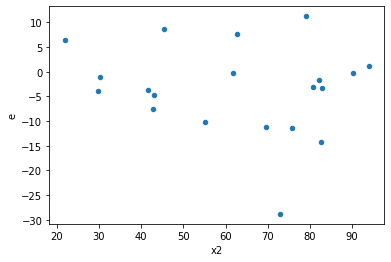

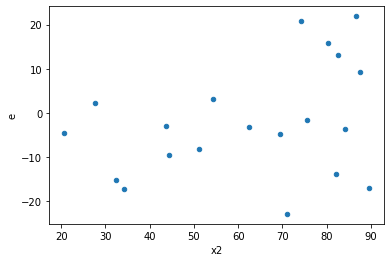

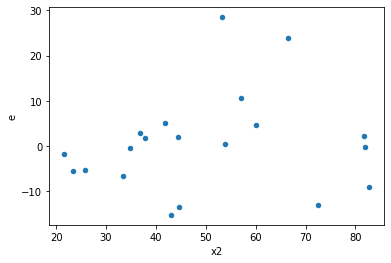

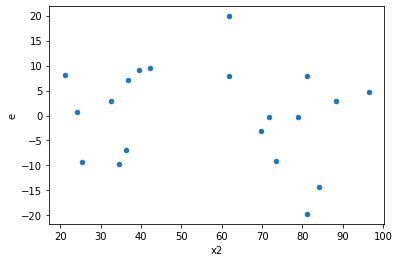

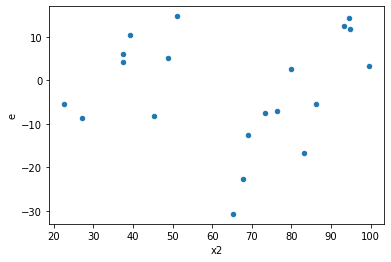

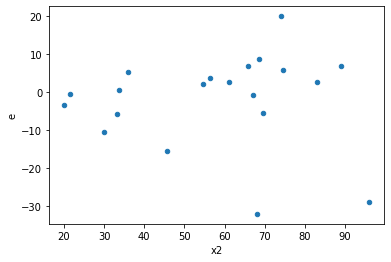

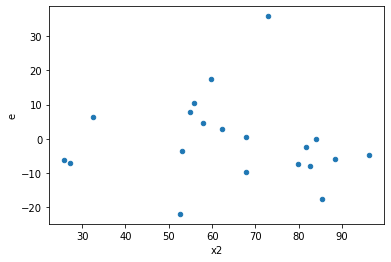

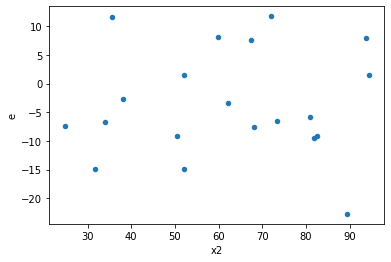

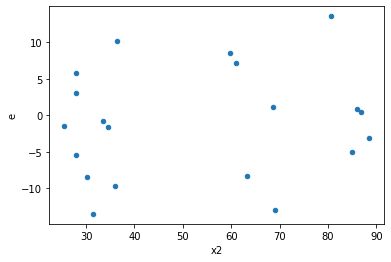

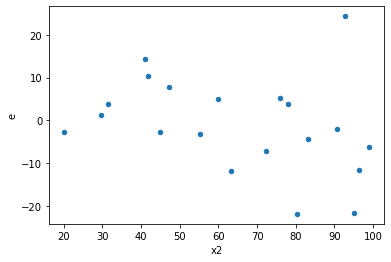

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,6.0,6.0,246.51207921091788,1616.225160983759,41.08534653515298,269.37086016395983,6.556373083855671,0.03763968157384556,0.9811801592130772,0.01881984078692278,Reject005=0 : Heteroscedasticity
3.0,6.0,6.0,463.8394172521601,2500.5986962604175,77.30656954202668,416.76644937673626,5.39108709448253,0.059757636543511294,0.9701211817282444,0.029878818271755647,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,351.7767958486879,878.6683853609121,58.62946597478132,146.44473089348534,2.497800866145985,0.28985229211655383,0.8550738539417231,0.14492614605827692,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,387.6538672120242,655.3795777911109,64.60897786867069,109.22992963185182,1.6906308261660044,0.5394464379335737,0.7302767810332131,0.26972321896678686,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,487.8719203454889,1089.2423293725096,81.31198672424814,181.5403882287516,2.232639928531155,0.3513218278351975,0.8243390860824013,0.17566091391759875,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,288.7485936204758,1615.1300308947132,48.124765603412634,269.1883384824522,5.593551160348165,0.05486096868894785,0.9725695156555261,0.027430484344473927,Reject005=1 : Homoscedasticity
9.0,6.0,6.0,537.8127662636257,1073.263051741621,89.63546104393761,178.87717529027017,1.9956072430149934,0.42120244334034407,0.789398778329828,0.21060122167017203,Reject005=1 : Homoscedasticity
10.0,6.0,6.0,143.69172569879316,238.88236477132523,23.948620949798862,39.81372746188754,1.662464304117767,0.5523670782941519,0.7238164608529241,0.27618353914707594,Reject005=1 : Homoscedasticity
11.0,6.0,6.0,307.0192761199598,1381.193341493828,51.16987935332663,230.19889024897134,4.498718643822751,0.08986632666795269,0.9550668366660237,0.044933163333976345,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,335.3919155909465,291.611235737834,55.89865259849108,48.60187262297234,0.8694641169988467,0.8695024976963597,Reject005=1 : Homoscedasticity
1.0,6.0,6.0,246.51207921091788,1616.225160983759,41.08534653515298,269.37086016395983,6.556373083855671,0.03763968157384556,Reject005=0 : Heteroscedasticity
2.0,6.0,6.0,920.4244136860726,788.5775381991535,153.40406894767878,131.42958969985892,0.8567542608317994,0.8559195787428873,Reject005=1 : Homoscedasticity
3.0,6.0,6.0,463.8394172521601,2500.5986962604175,77.30656954202668,416.76644937673626,5.39108709448253,0.059757636543511294,Reject005=1 : Homoscedasticity
4.0,6.0,6.0,351.7767958486879,878.6683853609121,58.62946597478132,146.44473089348534,2.497800866145985,0.28985229211655383,Reject005=1 : Homoscedasticity
5.0,6.0,6.0,387.6538672120242,655.3795777911109,64.60897786867069,109.22992963185182,1.6906308261660044,0.5394464379335737,Reject005=1 : Homoscedasticity
6.0,6.0,6.0,1124.8844389613578,874.1492009275242,187.48073982689297,145.6915334879207,0.7771013365023117,0.7672770231208282,Reject005=1 : Homoscedasticity
7.0,6.0,6.0,487.8719203454889,1089.2423293725096,81.31198672424814,181.5403882287516,2.232639928531155,0.3513218278351975,Reject005=1 : Homoscedasticity
8.0,6.0,6.0,288.7485936204758,1615.1300308947132,48.124765603412634,269.1883384824522,5.593551160348165,0.05486096868894785,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      776
Reject005=0 : Heteroscedasticity    224
Name: Result_test, dtype: int64